In [193]:
from samplers import *

import numpy as np
import sklearn
import sklearn.metrics
import scipy
import torch
from torch import nn
import torch.nn.functional as F
from matplotlib import pyplot as plt


In [298]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(512, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 512)
    
    def forward(self, x):
        x = x.view(-1, 512)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def name(self):
        return "MLP"


In [301]:
D = MLP()

In [302]:
lr = 0.001
optimizer = torch.optim.SGD(D.parameters(), lr=lr)

In [303]:
losses = []
n_epochs = 500
for epoch in range(n_epochs):
    x_d = torch.FloatTensor(next(distribution4(512)))
    y_g = torch.FloatTensor(next(distribution2()))
    optimizer.zero_grad()
    real_pred = torch.log(torch.abs(D(x_d)))
    real_pred[real_pred != real_pred] = 100000
    fake_pred = torch.log(torch.abs(1 - D(y_g)))
    fake_pred[fake_pred != fake_pred] = 100000
    
    loss = np.log(2) + 0.5 * torch.mean(real_pred) + 0.5 * torch.mean(fake_pred)
    loss.backward()
    optimizer.step()
    losses.append(loss.data.numpy())
    print(loss)
    

tensor(-0.6610, grad_fn=<AddBackward0>)
tensor(-0.6321, grad_fn=<AddBackward0>)
tensor(-0.5788, grad_fn=<AddBackward0>)
tensor(-0.6207, grad_fn=<AddBackward0>)
tensor(-0.5585, grad_fn=<AddBackward0>)
tensor(-0.4737, grad_fn=<AddBackward0>)
tensor(-0.4903, grad_fn=<AddBackward0>)
tensor(-0.4269, grad_fn=<AddBackward0>)
tensor(-0.5270, grad_fn=<AddBackward0>)
tensor(-0.5603, grad_fn=<AddBackward0>)
tensor(-0.5199, grad_fn=<AddBackward0>)
tensor(-0.5096, grad_fn=<AddBackward0>)
tensor(-0.5350, grad_fn=<AddBackward0>)
tensor(-0.4908, grad_fn=<AddBackward0>)
tensor(-0.5190, grad_fn=<AddBackward0>)
tensor(-0.5907, grad_fn=<AddBackward0>)
tensor(-0.5575, grad_fn=<AddBackward0>)
tensor(-0.5879, grad_fn=<AddBackward0>)
tensor(-0.4952, grad_fn=<AddBackward0>)
tensor(-0.4957, grad_fn=<AddBackward0>)
tensor(-0.5853, grad_fn=<AddBackward0>)
tensor(-0.5512, grad_fn=<AddBackward0>)
tensor(-0.4751, grad_fn=<AddBackward0>)
tensor(-0.5583, grad_fn=<AddBackward0>)
tensor(-0.5717, grad_fn=<AddBackward0>)


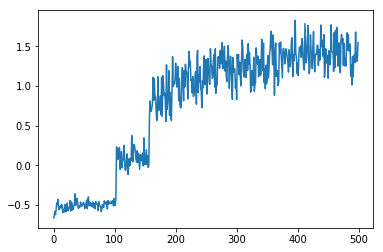

In [304]:
plt.plot(np.array(losses).flatten())

In [248]:
def jsd(p, q):
    # find the norm and calculate r
    p = (p / p.sum()).flatten()
    q = (q / q.sum()).flatten()
    r = 0.5 * (p + q)
    
    # find the first kl and do some data wrangling (we get some nans)
    first_kl = p * np.log(p / r)
    first_kl[np.isnan(first_kl)] = 100.
    first_kl = np.sum(first_kl)

    # find the first kl and do some data wrangling (we get some nans)
    second_kl = q * np.log(q / r)
    second_kl[np.isnan(second_kl)] = 100.
    second_kl = np.sum(second_kl)
    
    # find the JSD
    return np.log(2) + first_kl / 2. + second_kl / 2.


In [261]:
jsd(x_d.flatten().numpy(), y_g[:512, 0].numpy())

/Users/martinweiss/.pyenv/versions/3.5.2/lib/python3.5/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':
/Users/martinweiss/.pyenv/versions/3.5.2/lib/python3.5/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  


9000.440461633685

In [50]:

jsd(next(distribution3()), next(distribution3()))

/Users/martinweiss/.pyenv/versions/3.5.2/lib/python3.5/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':
/Users/martinweiss/.pyenv/versions/3.5.2/lib/python3.5/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  


0.20500252021681908